In [180]:
import numpy as np
import random as rnd
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

In [181]:

def add_noise(image, scale):
    n = int(len(image)**2*scale)
    new_img = np.array(image)
    for i in range(n):
        x_indx = rnd.randint(0,image.shape[0]-1)
        y_indx = rnd.randint(0,image.shape[1]-1)
        new_img[x_indx, y_indx] = 1 if new_img[x_indx, y_indx] < 0 else -1
    return new_img
    

In [182]:
def AddImage(path):
  test_img = Image.open(path)
  test_img = test_img.convert("L")

  test_img = test_img.resize((20,20))
  test_x = np.array(test_img, np.int32)
  test_x = test_x/255
  test_x = np.round(test_x)
  test_x = np.where(test_x <= 0, -1, 1)
  return test_x

def AddImageToArray(x, folderPath):
  for filename in os.listdir(folderPath):
    f = os.path.join(folderPath, filename)
    if os.path.isfile(f):
      x.append(AddImage(os.path.join(folderPath, filename)))
    else:
      AddImageToArray(x, f)

In [183]:
x = []

AddImageToArray(x,'Alphabet')

x = np.array(x)
print(x[0].shape)

(20, 20)


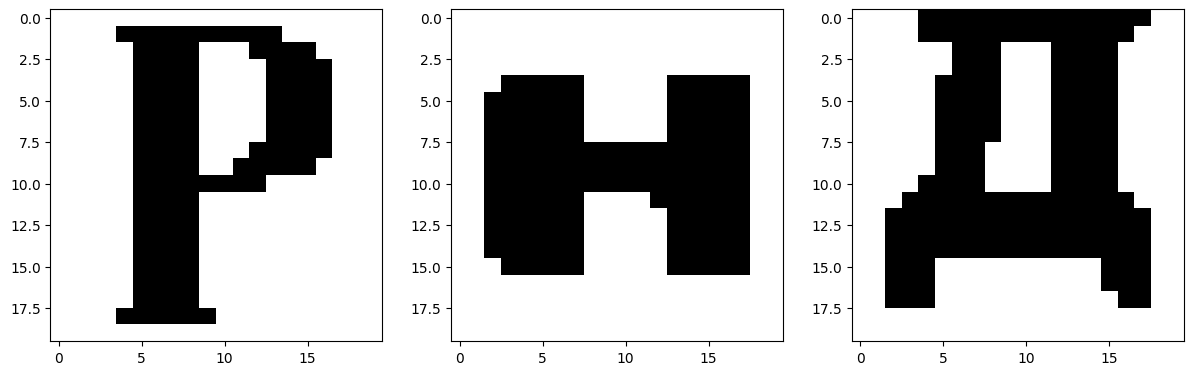

In [184]:

plt.figure(figsize=(25,25))
for i in range(len(x)):
  plt.subplot(5,5, i+1)
  plt.imshow(x[i],cmap='gray')
  
plt.show()

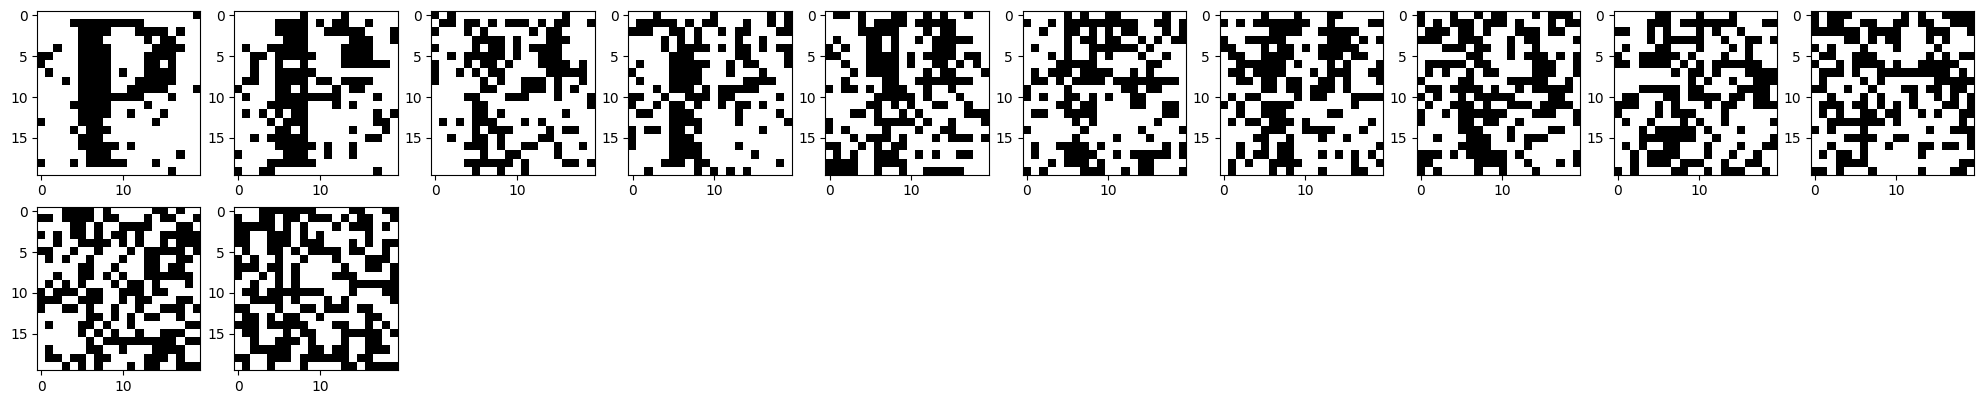

In [185]:
x_noises = []
for i in x[:1]:
    x_noises.append(add_noise(i, 0.1))
    x_noises.append(add_noise(i, 0.2))
    x_noises.append(add_noise(i, 0.3))
    x_noises.append(add_noise(i, 0.35))
    x_noises.append(add_noise(i, 0.4))
    x_noises.append(add_noise(i, 0.45))
    x_noises.append(add_noise(i, 0.5))
    x_noises.append(add_noise(i, 0.6))
    x_noises.append(add_noise(i, 0.7))
    x_noises.append(add_noise(i, 0.8))
    x_noises.append(add_noise(i, 0.9))
    x_noises.append(add_noise(i, 1))

plt.figure(figsize=(25,25))
for i in range(len(x_noises)):
  plt.subplot(10,10, i+1)
  plt.imshow(x_noises[i],cmap='gray')
  
plt.show()

In [186]:
print(x.shape)
x_train = x.reshape((x.shape[0], x[0].shape[0]**2))
print(x_train.shape)

(3, 20, 20)
(3, 400)


In [187]:
class Hopfild_network:
  def fit(self,X_train):
    X_train = np.array(X_train)
    train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]**2))
    self.X_train = train
    self.N = len(train[0])
    self.Weights = np.zeros(shape = (self.N, self.N), dtype = float)

    for model in train:
      for i in range(0,self.N):
        for j in range(0,self.N):
          self.Weights[i,j] += model[i] * model[j]
    self.Weights /= self.N
    for row in range(self.N):
      self.Weights[row,row] = 0.0


  def predict(self, X_test, max_loss = 0.0, times = 1000):
    X_test = np.array(X_test)
    y = []
    test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]**2))
    for t in test:
      test_model = np.array(t)
      n = 0
      while any(self.__comp_func__(test_model) > max_loss) and n < times:
        r = np.random.randint(0, self.N)
        net = 0
        for i in range(0, self.N):
            net += test_model[i] * self.Weights[i][r]
        s = self.__activate__(net)
        test_model[r] = s
        n+=1

      y.append(test_model.reshape(X_test[0].shape)) 
    return y

  def __activate__(self,pred):
    if(pred >= 0):
      pred = 1
    else:
      pred = -1
    return pred

  def __comp_func__(self,pred):
    losses = []
    for etalone in self.X_train:
      loss_sum = 0.0
      for i in range(len(etalone)):
        loss_sum += np.square(etalone[i] - pred[i])
      losses.append(np.sqrt(loss_sum) / len(etalone))
    return np.array(losses)

In [188]:
hopfild = Hopfild_network()
hopfild.fit(x)

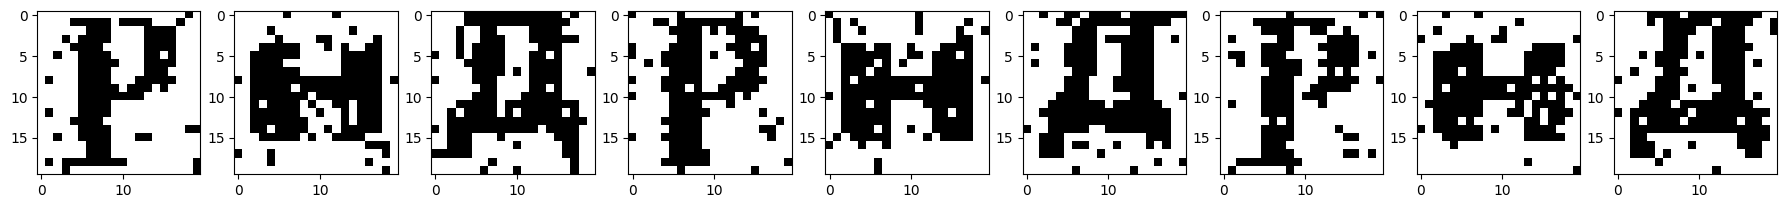

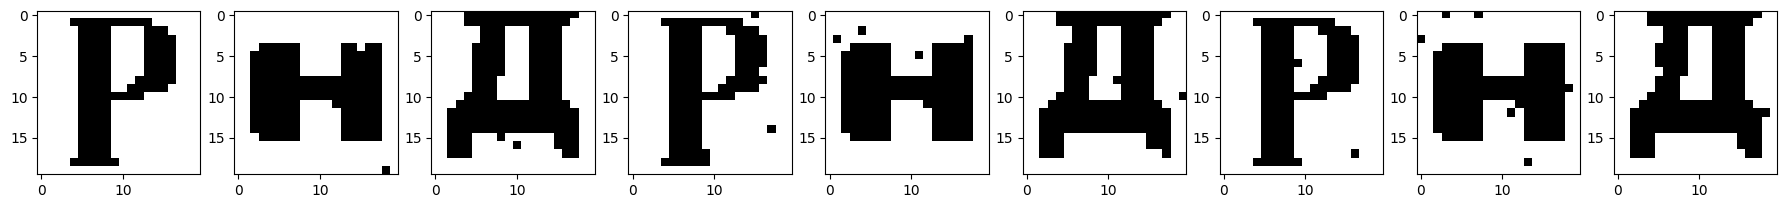

In [189]:
x_noises = []
for j in range(3):
    for i in x:
        x_noises.append(add_noise(i, 0.1))

plt.figure(figsize=(25,25))
for i in range(len(x_noises)):
  plt.subplot(10,10, i+1)
  plt.imshow(x_noises[i],cmap='gray')
  
plt.show()

plt.figure(figsize=(25,25))
pred = hopfild.predict(x_noises)
for i in range(len(pred)):
  plt.subplot(10,10, i+1)
  plt.imshow(pred[i],cmap='gray')

In [190]:
n = 9
accuracity = np.zeros(n)
noise_level = np.arange(0.1, 1, 0.1)
for k in range(n):
    x_noises = []
    for j in range(3):
        for i in x:
            x_noises.append(add_noise(i, noise_level[k]))
    
    max_loss = 0.01
    pred = hopfild.predict(x_noises,max_loss)
    for i in pred:
        if (hopfild.__comp_func__(i.reshape(-1)) <= max_loss).any():
            accuracity[k] +=1


[9. 3. 1. 1. 0. 0. 0. 0. 0.]


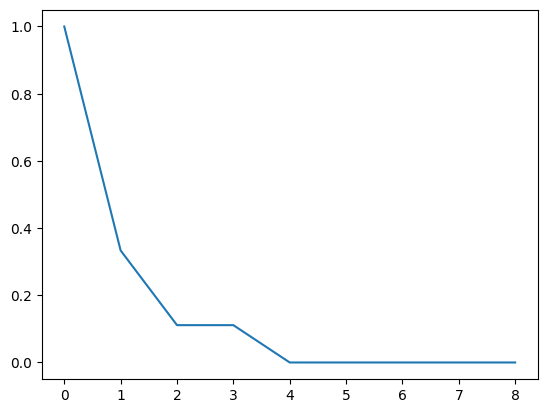

In [191]:
plt.plot(range(n),accuracity/n)
print(accuracity)